In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def get_eigenvalues(sample_name="sat", n_side=256):
    l_side = 250.0
    sample_filename = "../data/samples/sample%s.txt"%(sample_name)
    halo_data = np.loadtxt(sample_filename)
    x_halo = halo_data[:,0]
    y_halo = halo_data[:,1]
    z_halo = halo_data[:,2]
    n_points = np.size(x_halo)
    print n_points
    i_halo = np.int_(np.floor(x_halo*n_side/l_side))
    j_halo = np.int_(np.floor(y_halo*n_side/l_side))
    k_halo = np.int_(np.floor(z_halo*n_side/l_side))

    lambda_1 = -10*np.ones(n_points)
    lambda_2 = -10*np.ones(n_points)
    lambda_3 = -10*np.ones(n_points)

    for i in range(n_side):
        index = np.where(i_halo==i)
        index = index[0]
        n_in = np.size(index)
    
        env_data = np.loadtxt("../data/tweb/slice_tweb256_ix_%d.dat"%(i), delimiter=",")
        if(n_in):
            for ind in index:
                pos = np.where((env_data[:,2]==i_halo[ind])&
                            (env_data[:,3]==j_halo[ind])&
                            (env_data[:,4]==k_halo[ind]))
                pos = pos[0]
                lambda_1[ind] = env_data[pos,6]
                lambda_2[ind] = env_data[pos,7]
                lambda_3[ind] = env_data[pos,8]
    return lambda_1, lambda_2, lambda_3

In [39]:
eigen_1_A, eigen_2_A, eigen_3_A = get_eigenvalues(sample_name="sat")
eigen_1_B, eigen_2_B, eigen_3_B = get_eigenvalues(sample_name="pair")
eigen_1_C, eigen_2_C, eigen_3_C = get_eigenvalues(sample_name="mc2")
eigen_1_D, eigen_2_D, eigen_3_D = get_eigenvalues(sample_name="mc1")

32594
5845
241
154


In [40]:
delta_A = eigen_1_A + eigen_2_A + eigen_3_A
delta_B = eigen_1_B + eigen_2_B + eigen_3_B
delta_C = eigen_1_C + eigen_2_C + eigen_3_C
delta_D = eigen_1_D + eigen_2_D + eigen_3_D

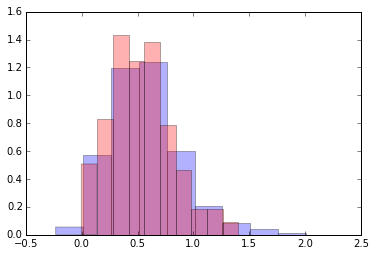

In [46]:
a = plt.hist(np.log10(delta_A+1.0), alpha=0.3, normed=1, color='blue')
a = plt.hist(np.log10(delta_D+1.0), alpha=0.3, normed=1, color='red')

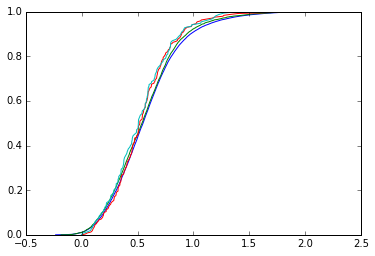

In [77]:
plt.plot(np.sort(np.log10(delta_A+1)), np.linspace(0.0,1.0,np.size(delta_A)))
plt.plot(np.sort(np.log10(delta_B+1)), np.linspace(0.0,1.0,np.size(delta_B)))
plt.plot(np.sort(np.log10(delta_C+1)), np.linspace(0.0,1.0,np.size(delta_C)))
plt.plot(np.sort(np.log10(delta_D+1)), np.linspace(0.0,1.0,np.size(delta_D)))

In [68]:
def environments(lambda_1, lambda_2, lambda_3, lambda_th=0.25):
    n_points = np.size(lambda_1)
    peak_index = np.where(lambda_3>lambda_th)
    filament_index = np.where((lambda_2>lambda_th) & (lambda_3<lambda_th))
    sheet_index = np.where((lambda_1>lambda_th) & (lambda_2<lambda_th))
    void_index = np.where(lambda_1<lambda_th)
    n_peak = 1.0*np.size(peak_index)/n_points
    n_fil = 1.0*np.size(filament_index)/n_points
    n_sheet = 1.0*np.size(sheet_index)/n_points
    n_void = 1.0*np.size(void_index)/n_points
    
    return n_peak, n_fil, n_sheet, n_void

In [72]:
print environments(eigen_1_A, eigen_2_A, eigen_3_A)
print environments(eigen_1_B, eigen_2_B, eigen_3_B)
print environments(eigen_1_C, eigen_2_C, eigen_3_C)
print environments(eigen_1_D, eigen_2_D, eigen_3_D)

(0.2442780879916549, 0.6059397435110757, 0.13919739829416458, 0.010584770203104867)
(0.2408896492728828, 0.5964071856287425, 0.1515825491873396, 0.011120615911035072)
(0.1991701244813278, 0.6390041493775933, 0.15352697095435686, 0.008298755186721992)
(0.16883116883116883, 0.6623376623376623, 0.15584415584415584, 0.012987012987012988)
